training_score: 0.9929577464788732
test_score: 0.993006993006993


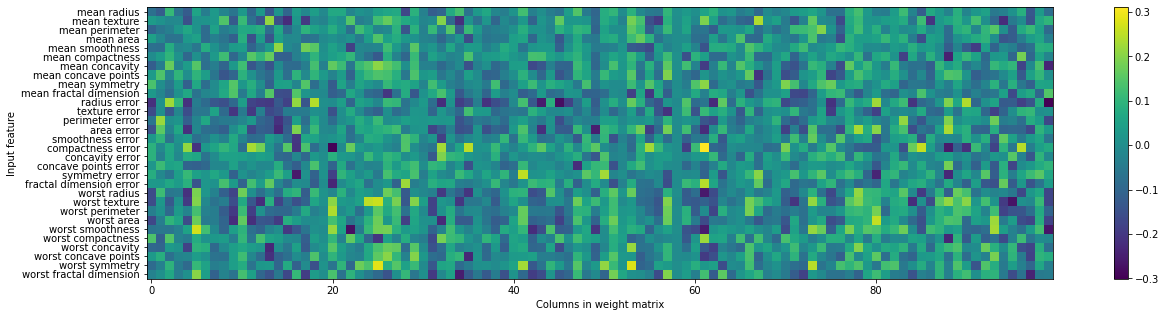

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split as tts
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
plt.ion()

a=load_breast_cancer()
X_train,X_test,y_train,y_test=tts(a.data,a.target,random_state=32)

ss=StandardScaler()
ss.fit(X_train)
X_train_scaled=ss.transform(X_train)
X_test_scaled=ss.transform(X_test)

mlpc=MLPClassifier(hidden_layer_sizes=(100),activation='relu',
                    solver='adam', alpha=0.1,max_iter=100000,
                    random_state=41)

mlpc.fit(X_train_scaled,y_train)
print('training_score:',mlpc.score(X_train_scaled,y_train))
print('test_score:',mlpc.score(X_test_scaled,y_test))

plt.figure(figsize=(20, 5))
plt.imshow(mlpc.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), a.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()
plt.subplots_adjust(right=1,left=0.15)